Iteration 1
Means: [ 2.05011303 17.0421795   6.17289607]
Variances: [1.18598421e-02 1.51246696e+01 6.07104852e+00]
Difference in means: 25.265188598645477

Iteration 2
Means: [ 2.03119605 17.07728704  6.12803693]
Variances: [5.51641998e-04 1.41497189e+01 6.20465711e+00]
Difference in means: 0.09888365920157538

Iteration 3
Means: [ 2.03015518 17.11835665  6.15281794]
Variances: [1.43733470e-106 1.38885587e+001 6.28534550e+000]
Difference in means: 0.06689149834123054

Iteration 4
Means: [ 2.03015518 17.15190422  6.1841596 ]
Variances: [ 0.         13.73174602  6.40853772]
Difference in means: 0.06488923838645633



C:\Users\egeme\AppData\Local\Temp\ipykernel_20660\1276913607.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  coefficient = 1.0 / (sig * np.sqrt(2.0 * np.pi))
C:\Users\egeme\AppData\Local\Temp\ipykernel_20660\1276913607.py:26: RuntimeWarning: divide by zero encountered in divide
  exponent = -0.5 * ((x - mu) / sig) ** 2
C:\Users\egeme\AppData\Local\Temp\ipykernel_20660\1276913607.py:27: RuntimeWarning: invalid value encountered in multiply
  result = coefficient * np.exp(exponent)
C:\Users\egeme\AppData\Local\Temp\ipykernel_20660\1276913607.py:26: RuntimeWarning: invalid value encountered in divide
  exponent = -0.5 * ((x - mu) / sig) ** 2


Iteration 5
Means: [nan nan nan]
Variances: [nan nan nan]
Difference in means: nan



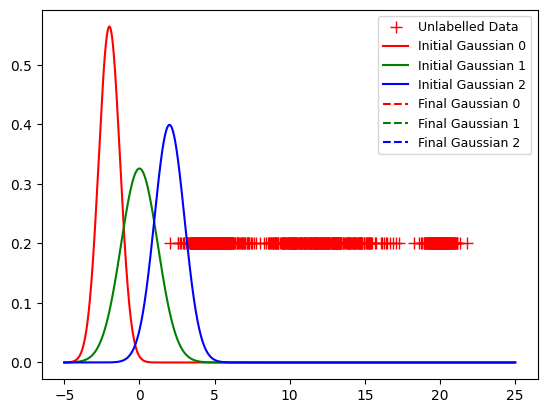

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

# Part 1: Create and plot the synthetic data 
# np.random.normal(mean, standard deviation, array length)
data0 = np.random.normal(5.0, 1.0, 300)
data1 = np.random.normal(12.0, 2.0, 300)
data2 = np.random.normal(20.0, 0.5, 300)
data = np.hstack((data0,data1,data2))

plt.ion()
fig = plt.figure()
plt.plot(data, np.ones(len(data))*0.2, '+r', ms=8, label='Unlabelled Data')
plt.legend(fontsize=9, loc=3)


# Initialize means and variances to specific values and plot initial distributions
means = [-2, 0, 2]
variances = [0.5, 1.5, 1.0]

#Part 2: 1D Gaussian probability distribution function that takes input, mean and standard deviation
def gaussian_1d(x, mu, sig):
    '''YOUR CODE HERE'''
    coefficient = 1.0 / (sig * np.sqrt(2.0 * np.pi))
    exponent = -0.5 * ((x - mu) / sig) ** 2
    result = coefficient * np.exp(exponent)
    return result
    '''YOUR CODE HERE'''


    
x = np.arange(-5,25,0.001)
dist0 = gaussian_1d(x,means[0],variances[0]**0.5)
dist1 = gaussian_1d(x,means[1],variances[1]**0.5)
dist2 = gaussian_1d(x,means[2],variances[2]**0.5)
plt.plot(x, dist0, '-r', label='Initial Gaussian 0')
plt.plot(x, dist1, '-g', label='Initial Gaussian 1')
plt.plot(x, dist2, '-b', label='Initial Gaussian 2')
l0 = plt.plot(x, dist0, '--r', label='Final Gaussian 0')
l1 = plt.plot(x, dist1, '--g', label='Final Gaussian 1')
l2 = plt.plot(x, dist2, '--b', label='Final Gaussian 2')

#Part 3: Expectation step (function to calculate the weights)
def computeWeights(data, means, variances):
    '''YOUR CODE HERE'''
    weights = np.zeros((len(data), len(means)))
    for i in range(len(means)):
        weights[:, i] = gaussian_1d(data, means[i], variances[i] ** 0.5)
    weights = weights / weights.sum(axis=1, keepdims=True)
    return weights
    '''YOUR CODE HERE'''

    
#Part 4: Maximization step (function to calculate new means and variances)
def calculateMeansVariances(data, weights):
    means = np.zeros(weights.shape[1])
    variances = np.zeros(weights.shape[1])
    '''YOUR CODE HERE'''
    for i in range(weights.shape[1]):
        weight_sum = weights[:, i].sum()
        means[i] = (weights[:, i] * data).sum() / weight_sum
        variances[i] = (weights[:, i] * (data - means[i]) ** 2).sum() / weight_sum
    '''YOUR CODE HERE'''

    return means, variances
    
#Part 5: EM iterations
stop_threshold = 0.001 # Stopping criteria is the sum of absolute differences between old and new means
dif_means = 1
iteration = 1

while dif_means>stop_threshold:
    old_means = np.copy(means)
    weights = computeWeights(data, means, variances)
    means, variances = calculateMeansVariances(data, weights)
    dif_means = np.abs(old_means - means).sum()
    '''YOUR CODE HERE'''
    print(f"Iteration {iteration}")
    print(f"Means: {means}")
    print(f"Variances: {variances}")
    print(f"Difference in means: {dif_means}\n")
    
    dist0 = gaussian_1d(x, means[0], variances[0] ** 0.5)
    dist1 = gaussian_1d(x, means[1], variances[1] ** 0.5)
    dist2 = gaussian_1d(x, means[2], variances[2] ** 0.5)
    l0[0].set_ydata(dist0)
    l1[0].set_ydata(dist1)
    l2[0].set_ydata(dist2)
    plt.draw()
    plt.legend(fontsize=9, loc=0)
    time.sleep(0.5)
    iteration += 1

plt.ioff()
plt.show()
